# Imports

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec
from scipy import stats

In [3]:
df_raw_A = {
        'visits_A': [24186,22240,21915,24046,21620,21651,22624,25476,24323,26996,24418,26906,21262,20247,
                     21377,21237,26087,25624,24754,23289,21968,21819,20614,1878,23902,21089,19559,16136,
                     19584,16925,23675,26319,20691,21535,25220,22885,24725,25090,26551,24389,23229,24359,
                     25755,25270,23617,21501,24459,23413,21180,19490,28164,19612,21471,27168,25076,25819,
                     26386,26784,23836,26784,23879,24669,22962,24776,23591,20815,22421,25601,24885,20281,
                     22752,716],

        'clicks_A': [1642,1660,1728,1878,1234,1320,1826,2768,2940,3016,2060,3072,1984,1544,1496,1372,2278,
                     2314,2284,1452,1810,2162,1410,1294,2096,1366,1262,1022,1444,1114,1688,2362,1210,1518,
                     3646,1954,2146,2100,2794,2064,1886,1732,2878,1700,1968,1430,1254,1642,1558,1148,1282,
                     1264,1568,2254,1416,1778,1895,1548,2072,2248,1682,1152,1540,1270,1848,1928,1464,1746,
                     2222,1184,1170,62]
        
        }

In [4]:
df_raw_B = {
        'visits_B': [24909,22986,22953,24896,22284,22564,23196,26238,24871,27869,25301,27779,22008,21020,
                     22037,22006,27070,26169,25518,24043,22593,22195,21015,19337,24448,21765,19933,16672,
                     20329,17638,24427,27232,24585,24896,20316,21468,21966,25987,23607,25487,25037,26214,
                     25999,24272,22336,25271,24220,22014,20195,29069,25648,20316,28945,20320,22058,28055,
                     25992,26678,26949,27701,24951,25561,23766,25646,24677,21441,23269,26265,25563,20869,
                     23276,707],

        'clicks_B': [1714,1778,1848,2008,1270,1372,1868,2872,3014,3110,2094,3278,1982,1648,1500,1362,2582,
                     2326,2386,1540,1892,2160,1476,1336,2108,1418,1522,1078,1550,1156,1861,2288,1228,1602,
                     3766,2000,2023,2166,3010,2010,1928,1890,2960,1716,1950,1534,1418,1796,1522,1224,1346,
                     1350,1534,2436,1404,1790,2156,1546,2180,2574,1824,1162,1586,1390,1950,2020,1484,1818,
                     2348,1280, 1136,60]
            }

In [5]:
df = pd.concat([pd.DataFrame(df_raw_A), pd.DataFrame(df_raw_B)], axis=1)
df.head()

,visits_A,clicks_A,visits_B,clicks_B
0,24186,1642,24909,1714
1,22240,1660,22986,1778
2,21915,1728,22953,1848
3,24046,1878,24896,2008
4,21620,1234,22284,1270


# A/B Frequentista

In [6]:
df['acc_visits_A'] = np.cumsum(df['visits_A'])
df['acc_visits_B'] = np.cumsum(df['visits_B'])

df['acc_clicks_A'] = np.cumsum(df['clicks_A'])
df['acc_clicks_B'] = np.cumsum(df['clicks_B'])

df['convertion'] = ( df['clicks_A'] + df['clicks_B']) / ( df['visits_A'] + df['visits_B'] ) 

In [7]:
numerador = (df['acc_clicks_B'] / df['acc_visits_B']) - (df['acc_clicks_A'] / df['acc_visits_A'])
denominador = np.sqrt((df['convertion'] * ( 1 - df['convertion'])) * ((1/ df['acc_visits_A']) + (1/df['acc_visits_B'])))
df['z'] = numerador / denominador

In [8]:
df.head()

,visits_A,clicks_A,visits_B,clicks_B,acc_visits_A,acc_visits_B,acc_clicks_A,acc_clicks_B,convertion,z
0,24186,1642,24909,1714,24186,24909,1642,1714,0.068357,0.403823
1,22240,1660,22986,1778,46426,47895,3302,3492,0.076018,1.034435
2,21915,1728,22953,1848,68341,70848,5030,5340,0.079700,1.219713
3,24046,1878,24896,2008,92387,95744,6908,7348,0.079400,1.583106
4,21620,1234,22284,1270,114007,118028,8142,8618,0.057034,1.661355


In [9]:
df['ctr_A'] = ( df['acc_clicks_A'] / df['acc_visits_A'] )
df['ctr_B'] = ( df['acc_clicks_B'] / df['acc_visits_B'] )

df['acc_ctr_A'] = df['ctr_A'].cumsum()
df['acc_ctr_B'] = df['ctr_B'].cumsum()

In [10]:
df.head()

,visits_A,clicks_A,visits_B,clicks_B,acc_visits_A,acc_visits_B,acc_clicks_A,acc_clicks_B,convertion,z,ctr_A,ctr_B,acc_ctr_A,acc_ctr_B
0,24186,1642,24909,1714,24186,24909,1642,1714,0.068357,0.403823,0.067891,0.068810,0.067891,0.068810
1,22240,1660,22986,1778,46426,47895,3302,3492,0.076018,1.034435,0.071124,0.072909,0.139014,0.141720
2,21915,1728,22953,1848,68341,70848,5030,5340,0.079700,1.219713,0.073601,0.075373,0.212616,0.217093
3,24046,1878,24896,2008,92387,95744,6908,7348,0.079400,1.583106,0.074772,0.076746,0.287388,0.293839
4,21620,1234,22284,1270,114007,118028,8142,8618,0.057034,1.661355,0.071417,0.073017,0.358805,0.366855


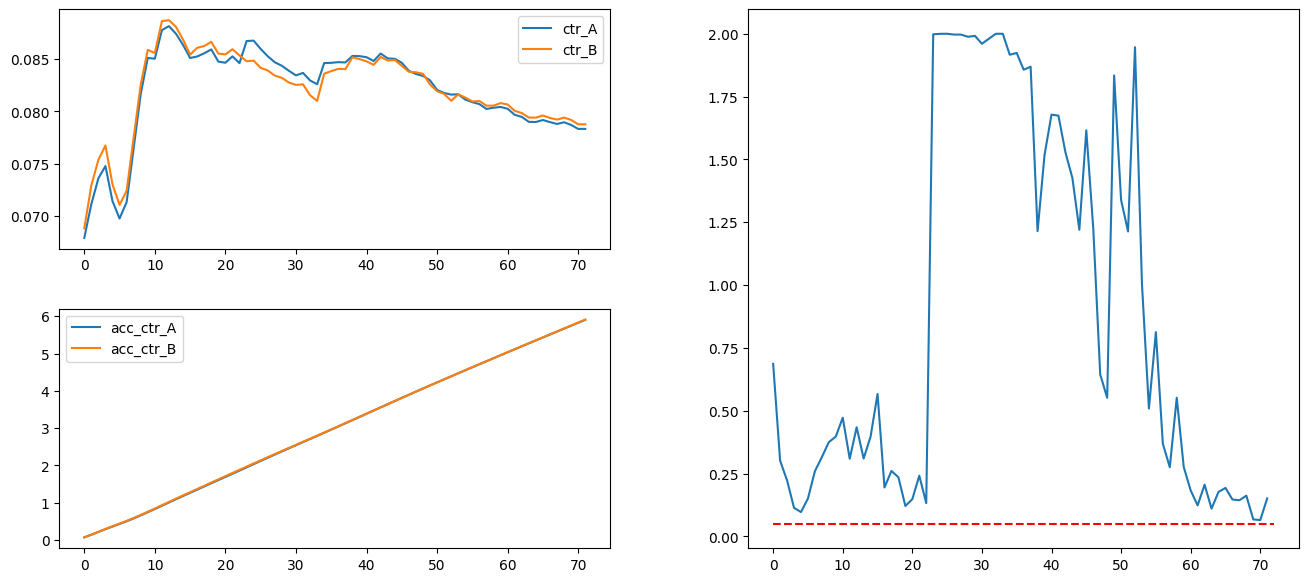

In [11]:
f = plt.figure( figsize=(16,7) )
gs0 = gridspec.GridSpec( 2, 2, figure=f, wspace=0.25, hspace=0.25 )

ax1 = f.add_subplot( gs0[:1, :1])
ax2 = f.add_subplot( gs0[1:, :1])
ax3 = f.add_subplot( gs0[:, 1:])

ax1.plot( df['ctr_A'], label = 'ctr_A')
ax1.plot( df['ctr_B'], label = 'ctr_B')
ax1.legend()

ax2.plot( df['acc_ctr_A'], label = 'acc_ctr_A')
ax2.plot( df['acc_ctr_B'], label = 'acc_ctr_B')
ax2.legend()

ax3.plot( 2*(1 - stats.norm.cdf(df['z'])) )
ax3.hlines(0.05, 0, 72,linestyle = '--' ,color = 'red' )

# A/B Bayesiano

In [28]:
df1 = df.copy()

In [29]:
df1.head()

,visits_A,clicks_A,visits_B,clicks_B,acc_visits_A,acc_visits_B,acc_clicks_A,acc_clicks_B,convertion,z,ctr_A,ctr_B,acc_ctr_A,acc_ctr_B
0,24186,1642,24909,1714,24186,24909,1642,1714,0.068357,0.403823,0.067891,0.068810,0.067891,0.068810
1,22240,1660,22986,1778,46426,47895,3302,3492,0.076018,1.034435,0.071124,0.072909,0.139014,0.141720
2,21915,1728,22953,1848,68341,70848,5030,5340,0.079700,1.219713,0.073601,0.075373,0.212616,0.217093
3,24046,1878,24896,2008,92387,95744,6908,7348,0.079400,1.583106,0.074772,0.076746,0.287388,0.293839
4,21620,1234,22284,1270,114007,118028,8142,8618,0.057034,1.661355,0.071417,0.073017,0.358805,0.366855


In [30]:
# Quantidade de amostras
N_mc = 100000

In [45]:
proba_b_better_a = []
expected_loss_a = []
expected_loss_b = []
for day in range(len(df1)):
        
    u_a, var_a = stats.beta.stats( a= 1+ df1.loc[day, 'acc_clicks_A'],
                                b= 1 + (df1.loc[day, 'acc_visits_A'] - df1.loc[day, 'acc_clicks_A']),
                                moments= 'mv')

    u_b, var_b = stats.beta.stats( a= 1+ df1.loc[day, 'acc_clicks_B'],
                                b= 1 + (df1.loc[day, 'acc_visits_B'] - df1.loc[day, 'acc_clicks_B']),
                                moments= 'mv')

    # Amostras da distribuição normal A
    x_a = np.random.normal( loc = u_a,
                            scale = 1.25*np.sqrt( var_a ),
                            size = N_mc)

    # Amostras da distribuição normal B
    x_b = np.random.normal( loc = u_b,
                            scale = 1.25*np.sqrt( var_b ),
                            size = N_mc)

    #Distribuição beta da página A
    fa = stats.beta.pdf( x_a,
                        a = 1 + df1.loc[day, 'acc_clicks_A'],
                        b = 1 + (df1.loc[day, 'acc_visits_A'] - df1.loc[day, 'acc_clicks_A']))

    #Distribuição beta da página B
    fb = stats.beta.pdf( x_b,
                        a = 1 + df1.loc[day, 'acc_clicks_B'],
                        b = 1 + (df1.loc[day, 'acc_visits_B'] - df1.loc[day, 'acc_clicks_B']))

    #Distribuição normal da página A
    ga = stats.norm.pdf( x_a,
                        loc = u_a,
                        scale = 1.25*np.sqrt(var_a))

    #Distribuição normal da página B
    gb = stats.norm.pdf( x_b,
                        loc = u_b,
                        scale = 1.25*np.sqrt(var_b))

    # Beta/Normal
    y = (fa*fb) / (ga*gb)

    # Somente valores onde o B é maior do que A
    yb = y[x_b >= x_a]

    #probabilidade de B ser melhor que A
    p = ( 1 / N_mc)*np.sum(yb)

    # Erro ao assumir B melhor que A
    expected_loss_A = ( 1/N_mc ) * np.sum(((x_b - x_a)*y)[x_b >= x_a]) 
    expected_loss_B = ( 1/N_mc ) * np.sum(((x_a - x_b)*y)[x_a >= x_b]) 

    proba_b_better_a.append( p )
    expected_loss_a.append(expected_loss_A)
    expected_loss_b.append(expected_loss_B)

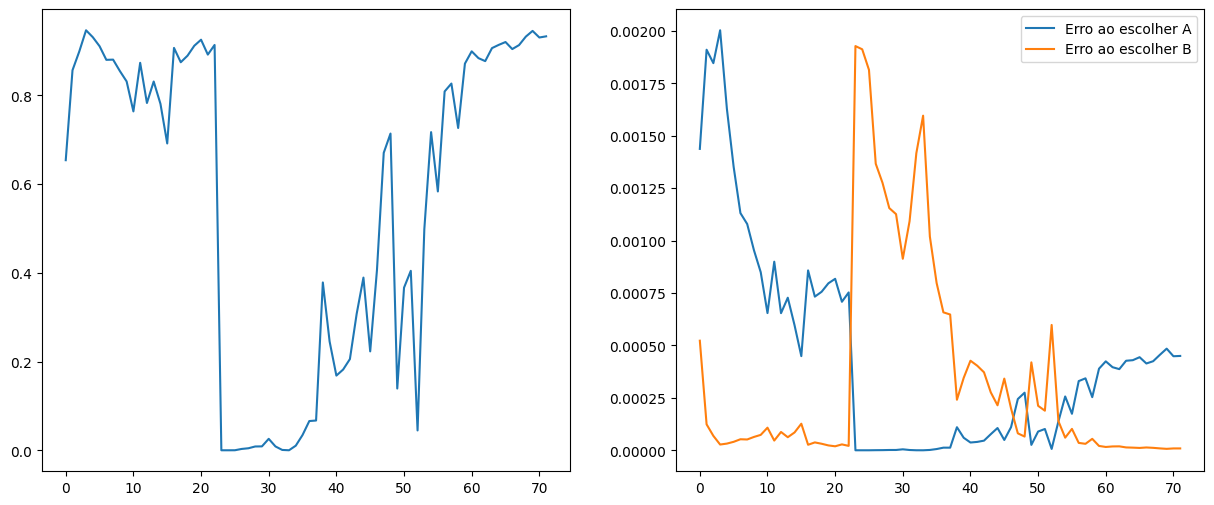

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].plot(proba_b_better_a)

axs[1].plot( expected_loss_a, label='Erro ao escolher A')
axs[1].plot( expected_loss_b, label='Erro ao escolher B')
plt.legend()